In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from ml_statistical_features import load_data_as_dataframe
from data_preparation import Data
import utils

In [2]:
def print_3bpm_coverage(data):
    all_data_3bpm = len(data[data['abs_err'] < 3])
    all_data = len(data.index)
    data_inf = data[data['informative']]
    inf_data_3bpm = len(data_inf[data_inf['abs_err'] < 3])
    print("3pm coverage auf allen Segmenten: ", 100/all_data * all_data_3bpm)
    print("3pm coverage auf informativen Segmenten: ", 100/len(data_inf.index) * inf_data_3bpm)

In [3]:
def bland_altman_plot(data1, data2):
    data1  = np.asarray(data1) 
    data2  = np.asarray(data2) 
    mean  = np.mean([data1, data2], axis=0) 
    diff  = data1 - data2     # Difference between data1 and data2 
    md  = np.mean(diff)     # Mean of the difference 
    sd  = np.std(diff, axis=0)   # Standard deviation of the difference
    
    plt.figure(figsize=(20,10))

    plt.scatter(mean, diff, s=1.0) 
    plt.axhline(md,   color='gray', linestyle='--') 
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--') 
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel("0.5 * (ecg_hr + bcg_hr)")
    plt.ylabel("ecg_hr - bcg_hr")

In [4]:
def print_5bpm_coverage(data):
    all_data_5bpm = len(data[data['abs_err'] < 5])
    all_data = len(data.index)
    data_inf = data[data['informative']]
    inf_data_5bpm = len(data_inf[data_inf['abs_err'] < 5])
    print("5pm coverage auf allen Segmenten: ", 100/all_data * all_data_5bpm)
    print("5pm coverage auf informativen Segmenten: ", 100/len(data_inf.index) * inf_data_5bpm)

In [5]:
def print_hr_stats(data):
    print("Durchschnittliche Herzrate nach BKG: ", data['bcg_hr'].median())
    
    inf_data = data[data['informative']]
    print("Durchschnittliche Herzrate nach BKG bei informativen Segmenten: ", inf_data['bcg_hr'].mean())
    print("Durchschnittliche Herzrate nach EKG bei informativen Segmenten: ", inf_data['ecg_hr'].mean())
    print("Durchschnittliche absolute Abweichung bei informativen Segmenten: ", inf_data['abs_err'].mean())
    print("Durchschnittliche relative Abweichung bei informativen Segmenten: ", inf_data['rel_err'].mean(), "%")
    

    print("Durchschnittliche Herzrate nach EKG: ", data['ecg_hr'].mean())

In [6]:
def print_distribution_stats(data):
    count_overall = len(data.index)
    count_informativ = len(data[data['informative']])
    percentage_informative = count_informativ/count_overall*100
    percentage_non_informative = 100 - percentage_informative
    print("insgesamt: %i, informativ: %.2f %s, nicht informativ: %.2f %s" % (count_overall, percentage_informative, "%", percentage_non_informative, "%"))
    return percentage_informative, percentage_non_informative

# 10 % / 5 bpm

In [7]:
data_10 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10), index_col=False)

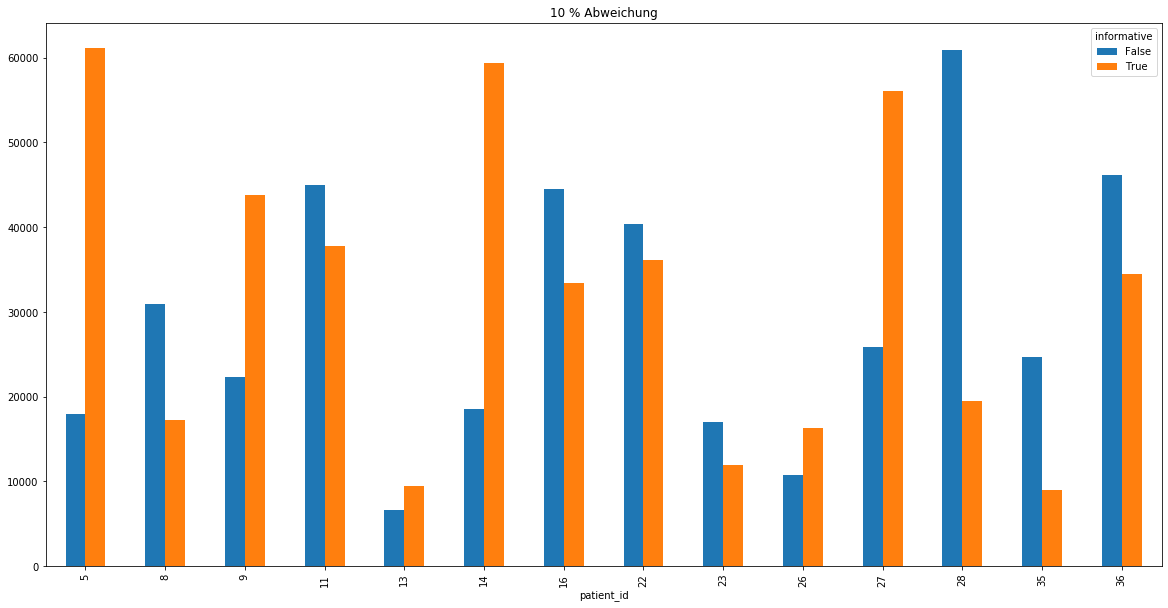

In [8]:
pd.crosstab(data_10['patient_id'],data_10['informative']).plot.bar(figsize=(20,10), title= "10 % Abweichung")

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5, 1.0, 'Alle Patienten (informativ)')

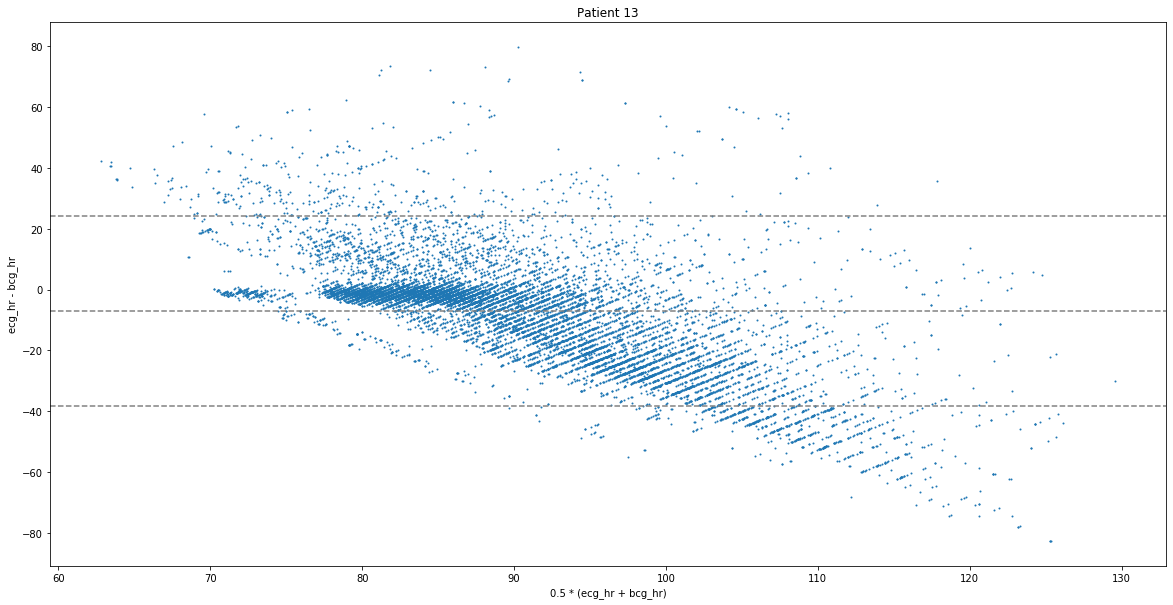

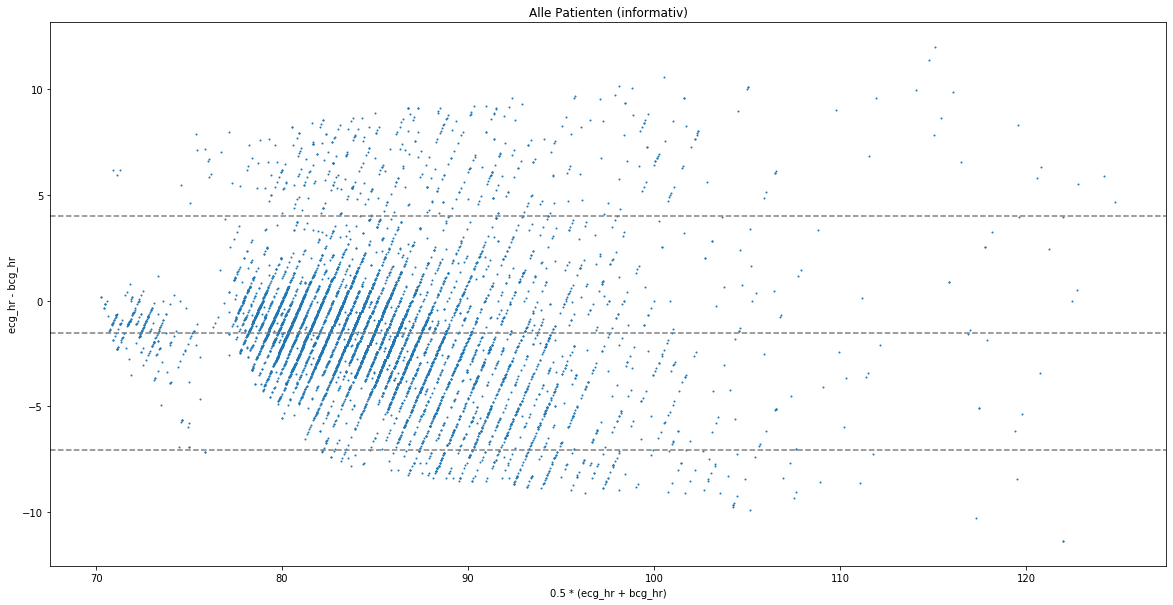

In [9]:
temp = data_10[data_10['patient_id']==13].copy()
temp = temp.replace([np.inf, -np.inf], np.nan).dropna()
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])
plt.title("Patient 13")
temp = temp[data_10['informative']]
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])
plt.title("Alle Patienten (informativ)")

In [10]:
print_distribution_stats(data_10)

insgesamt: 857143, informativ: 51.98 %, nicht informativ: 48.02 %


(51.980008003332, 48.019991996668)

In [11]:
print_3bpm_coverage(data_10)

3pm coverage auf allen Segmenten:  41.33487644418726
3pm coverage auf informativen Segmenten:  79.5207196611775


In [12]:
print_5bpm_coverage(data_10)

5pm coverage auf allen Segmenten:  47.09097548483742
5pm coverage auf informativen Segmenten:  90.59439829601183


In [13]:
print_hr_stats(data_10)

Durchschnittliche Herzrate nach BKG:  71.6417910447761
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  68.95961438373483
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  68.61618128874568
Durchschnittliche absolute Abweichung bei informativen Segmenten:  1.8537051479147713
Durchschnittliche relative Abweichung bei informativen Segmenten:  2.595139093481103 %
Durchschnittliche Herzrate nach EKG:  71.93444383352703


/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6684aae80>,
      dtype=object)

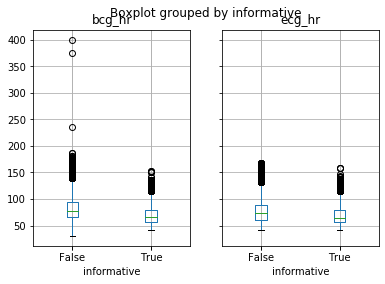

In [14]:
data_10.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative')

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


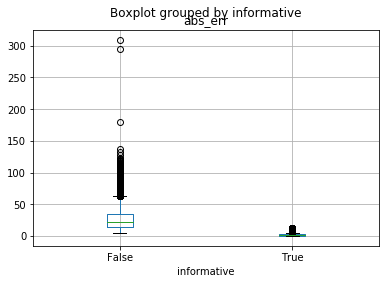

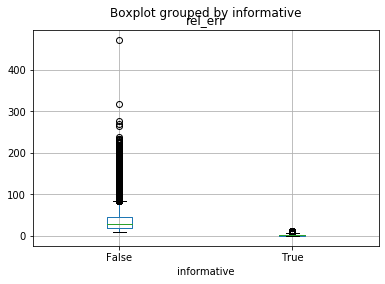

In [15]:
data_10.boxplot(column=['abs_err'],by='informative')
data_10.boxplot(column=['rel_err'],by='informative')

# 15 % / 7,5bpm

In [16]:
data_15 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=15), index_col=False)

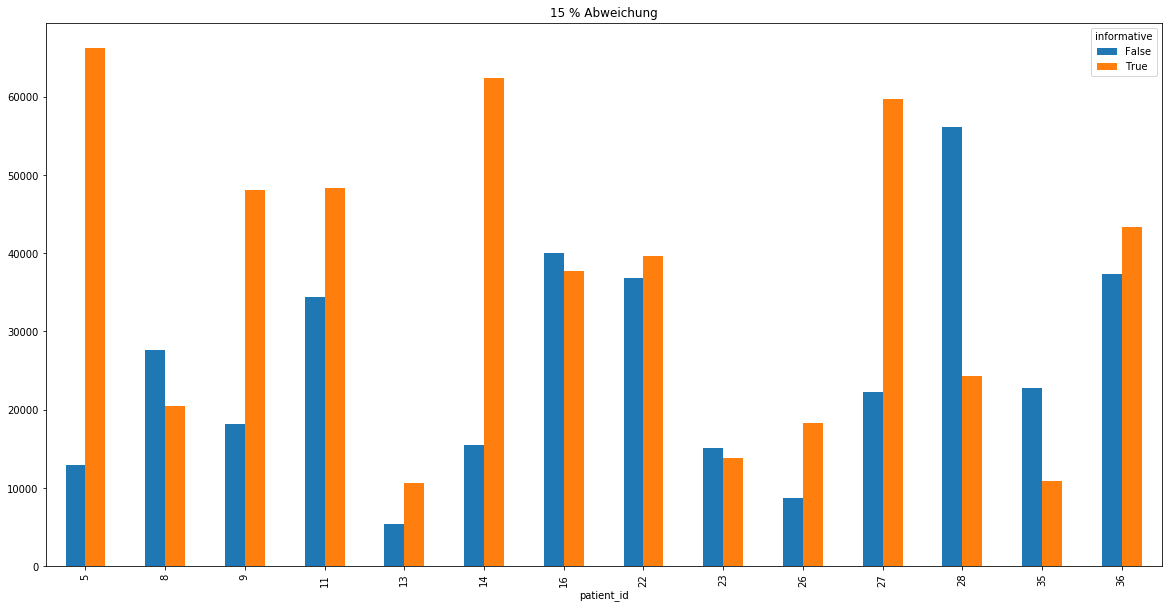

In [17]:
pd.crosstab(data_15['patient_id'],data_15['informative']).plot.bar(figsize=(20,10), title= "15 % Abweichung")

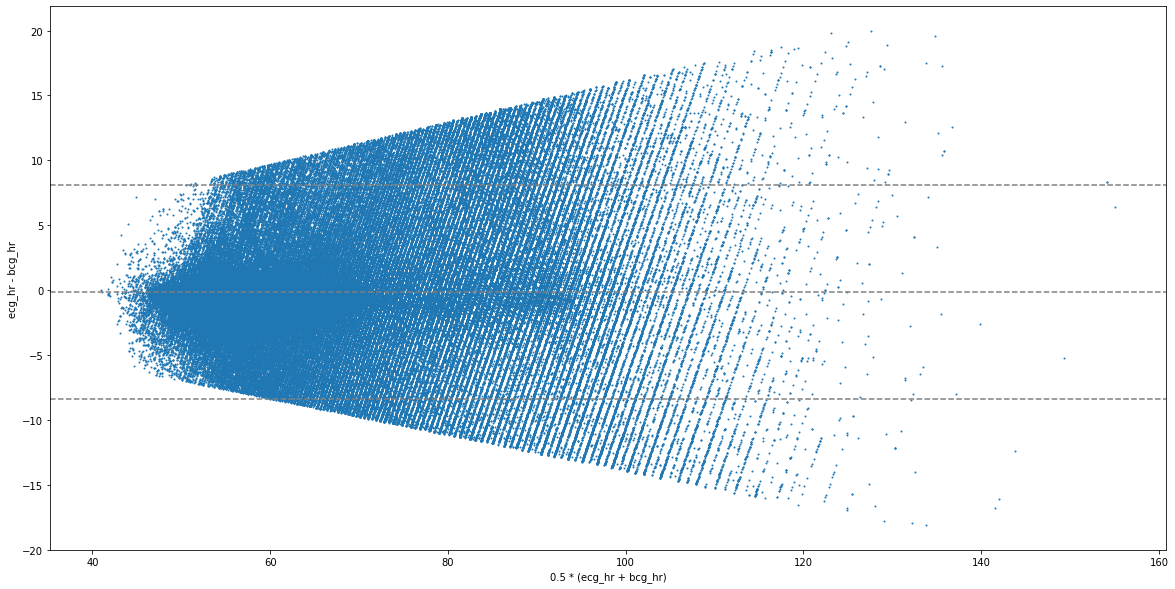

In [18]:
temp = data_15[data_15['informative']].copy()
temp = temp.replace([np.inf, -np.inf], np.nan).dropna()
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])

In [19]:
print_distribution_stats(data_15)

insgesamt: 857143, informativ: 58.79 %, nicht informativ: 41.21 %


(58.78739020210163, 41.21260979789837)

In [20]:
print_3bpm_coverage(data_15)

3pm coverage auf allen Segmenten:  41.33487644418726
3pm coverage auf informativen Segmenten:  70.31248759654846


In [21]:
print_5bpm_coverage(data_15)

5pm coverage auf allen Segmenten:  47.09097548483742
5pm coverage auf informativen Segmenten:  80.10387146452017


In [22]:
print_hr_stats(data_15)

Durchschnittliche Herzrate nach BKG:  71.6417910447761
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  69.76582246994536
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  69.64126788879322
Durchschnittliche absolute Abweichung bei informativen Segmenten:  2.759795178178698
Durchschnittliche relative Abweichung bei informativen Segmenten:  3.740545586803013 %
Durchschnittliche Herzrate nach EKG:  71.934443833527


/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd668cf1c88>,
      dtype=object)

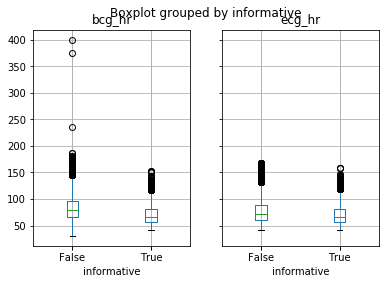

In [23]:
data_15.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative')

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


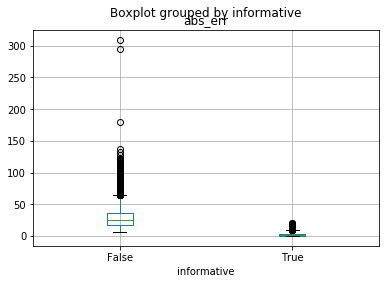

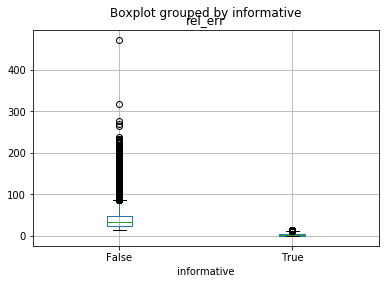

In [24]:
data_15.boxplot(column=['abs_err'],by='informative')
data_15.boxplot(column=['rel_err'],by='informative')

# 5 % / 2,5 bpm

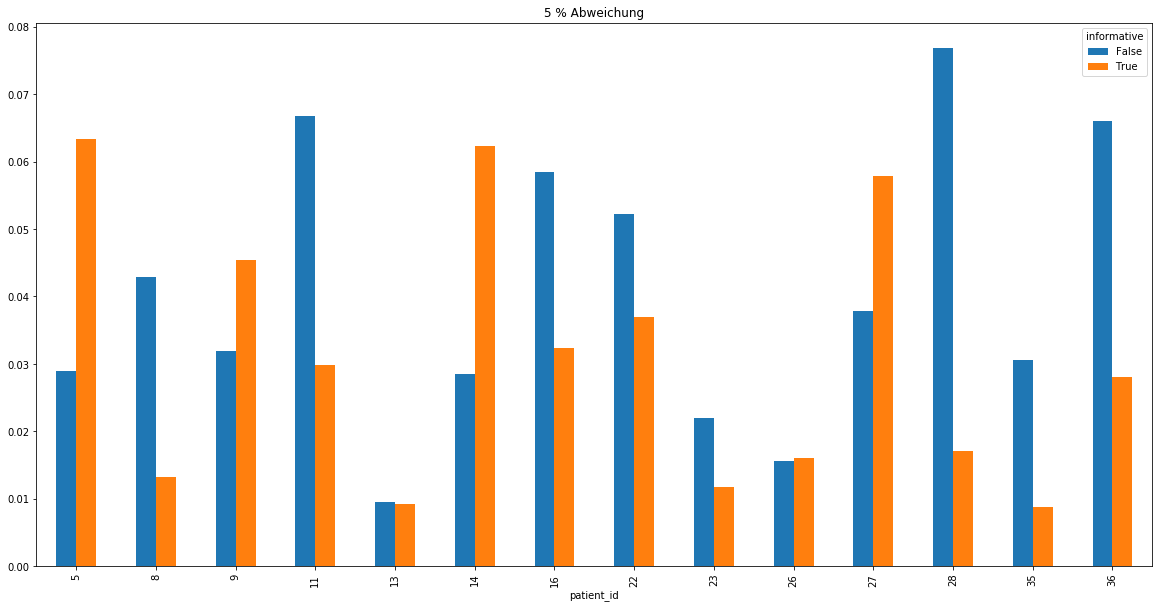

In [25]:
data_5 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=5), index_col=False)
pd.crosstab(data_5['patient_id'],data_5['informative'], normalize=True).plot.bar(figsize=(20,10), title= "5 % Abweichung")

In [26]:
print_distribution_stats(data_5)

insgesamt: 857143, informativ: 43.21 %, nicht informativ: 56.79 %


(43.212392797934534, 56.787607202065466)

In [27]:
print_3bpm_coverage(data_5)

3pm coverage auf allen Segmenten:  41.33487644418726
3pm coverage auf informativen Segmenten:  94.99665219551179


In [28]:
print_5bpm_coverage(data_5)

5pm coverage auf allen Segmenten:  47.09097548483742
5pm coverage auf informativen Segmenten:  99.95518261733514


In [29]:
print_hr_stats(data_5)

Durchschnittliche Herzrate nach BKG:  71.6417910447761
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  67.90126220672416
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  67.43179114130801
Durchschnittliche absolute Abweichung bei informativen Segmenten:  1.1249231274338574
Durchschnittliche relative Abweichung bei informativen Segmenten:  1.642441187433076 %
Durchschnittliche Herzrate nach EKG:  71.934443833527


/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd668fb9f28>,
      dtype=object)

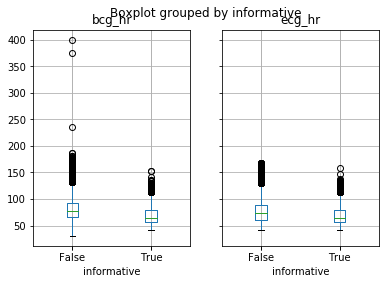

In [30]:
data_5.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative')

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


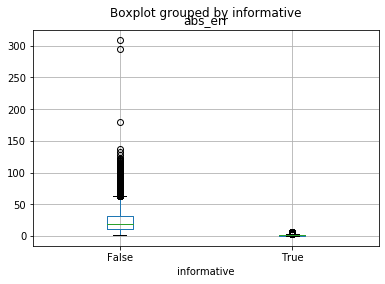

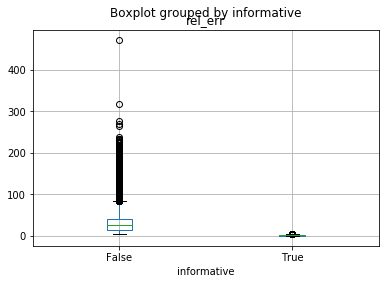

In [31]:
data_5.boxplot(column=['abs_err'],by='informative')
data_5.boxplot(column=['rel_err'],by='informative')

insgesamt: 857143, informativ: 43.21 %, nicht informativ: 56.79 %
insgesamt: 857143, informativ: 51.98 %, nicht informativ: 48.02 %
insgesamt: 857143, informativ: 58.79 %, nicht informativ: 41.21 %


([<matplotlib.axis.XTick at 0x7fd673c25e80>,
 <a list of 3 Text xticklabel objects>)

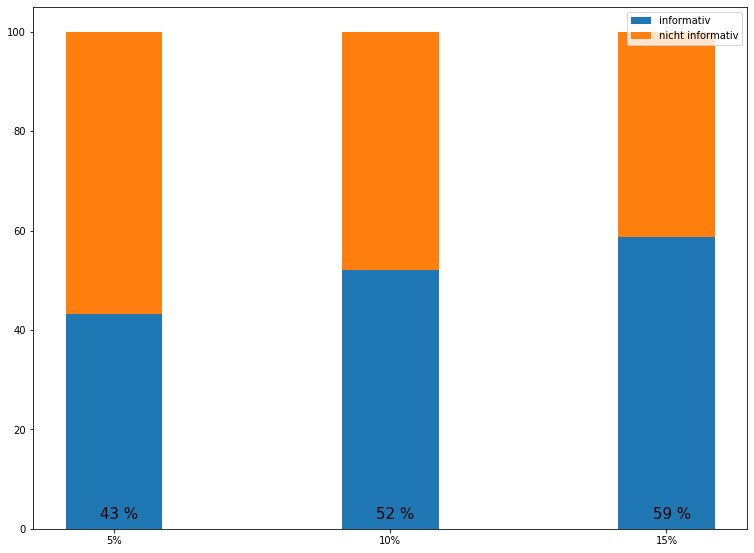

In [61]:
inf_5, non_inf_5 = print_distribution_stats(data_5)
inf_10, non_inf_10 = print_distribution_stats(data_10)
inf_15, non_inf_15 = print_distribution_stats(data_15)

inf = [inf_5, inf_10, inf_15]
non_inf = [non_inf_5, non_inf_10, non_inf_15]
ind = np.arange(3)
width=0.35

plt.figure(figsize=(12.8,9.6))
plt.bar(ind, inf, width, label="informativ")
plt.bar(ind, non_inf, width, bottom=inf, label="nicht informativ")
for index,data in enumerate(inf):
    plt.text(x=index-0.05 , y =2 , s=f"{round(data)} %" , fontdict=dict(fontsize=15))
plt.legend()
plt.xticks(ind, ('5%', '10%', '15%'))